In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NUM_POINTS = 150
np.random.seed(42)

In [4]:
def plot_clouds(data, clusters=None, line=None):
    plt.figure(figsize=(8, 6))
    if clusters is not None:
        plt.scatter(data[:, 0], data[:,1], c=clusters, cmap='Set1', alpha=0.6)
    else:
        plt.scatter(data[:, 0], data[:,1], alpha=0.6)

    if line is not None:
        plt.plot(line[:, 0], line[:, 1], 'k--', linewidth=2)
        plt.xlim(data[:,0].min()-1, data[:,0].max()+1)
        plt.ylim(data[:,1].min()-1, data[:,1].max()+1)

    plt.xlabel('Ось X')
    plt.ylabel('Ось Y')
    plt.grid(True)
    plt.show()

## 📌 **Теоретическая основа: разделение кластеров**  

В задачах **кластеризации** мы пытаемся разделить данные на группы (**кластеры**) без заранее известных меток. Один из базовых способов нахождения границы между двумя кластерами – это **серединный перпендикуляр** между их центрами.  

### **1. Центр кластера (Центроид)**  
Для простых случаев, когда данные распределены вокруг некоторых точек, можно вычислить **центр кластера** как среднее арифметическое всех его точек:  

$$
C = \left( \frac{1}{N} \sum_{i=1}^{N} x_i, \frac{1}{N} \sum_{i=1}^{N} y_i \right)
$$

где $N$ – количество точек в кластере, а $x_i, y_i$ – их координаты.  

Если у нас два кластера с центрами $C_1(x_1, y_1)$ и $C_2(x_2, y_2)$, то мы можем провести **линию, которая их разделяет**.  

---  

### **2. Разделяющая линия**  

Разделяющая линия – это **серединный перпендикуляр** к отрезку, соединяющему центры кластеров.  

1. **Находим середину отрезка между центроидами**:  
   $$
   M = \left( \frac{x_1 + x_2}{2}, \frac{y_1 + y_2}{2} \right)
   $$
  
2. **Вычисляем угловой коэффициент (наклон) перпендикуляра**:  
   - Прямая, соединяющая центры, имеет наклон:  
     $$
     k_{\text{осн}} = \frac{y_2 - y_1}{x_2 - x_1}
     $$
   - Перпендикуляр к ней имеет наклон:  
     $$
     k = -\frac{1}{k_{\text{осн}}}
     $$
  
3. **Записываем уравнение прямой в виде**:  
   $$
   y = kx + b
   $$
   Чтобы найти $b$, подставляем координаты точки $M$:  
   $$
   b = y_M - k x_M
   $$

Таким образом, прямая, разделяющая кластеры, описывается уравнением:  

$$
y = -\frac{1}{k_{\text{осн}}} x + \left( y_M + \frac{x_M}{k_{\text{осн}}} \right)
$$


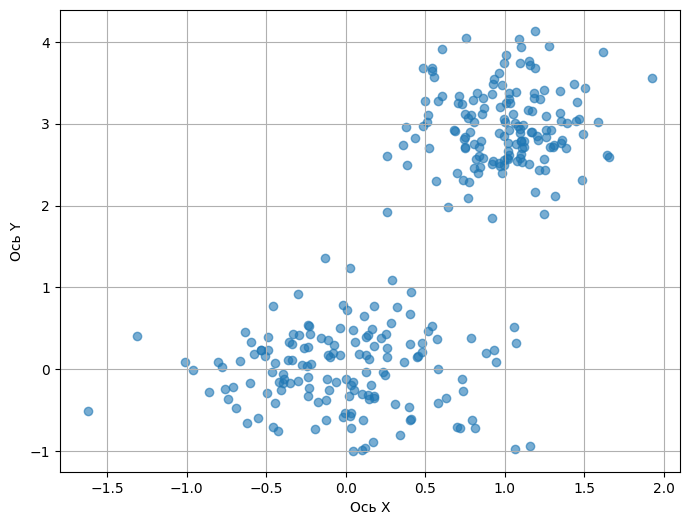

In [5]:
center_1 = (0,0)
center_2 = (1,3)

cloud_1 = np.random.normal(center_1, 0.5, (NUM_POINTS, 2))  # Первое облако
cloud_2 = np.random.normal(center_2, (0.3,0.5), (NUM_POINTS, 2))  # Второе облако

data = np.vstack([cloud_1, cloud_2])
clusters = np.vstack([np.zeros(NUM_POINTS), np.ones(NUM_POINTS)])

plot_clouds(data)

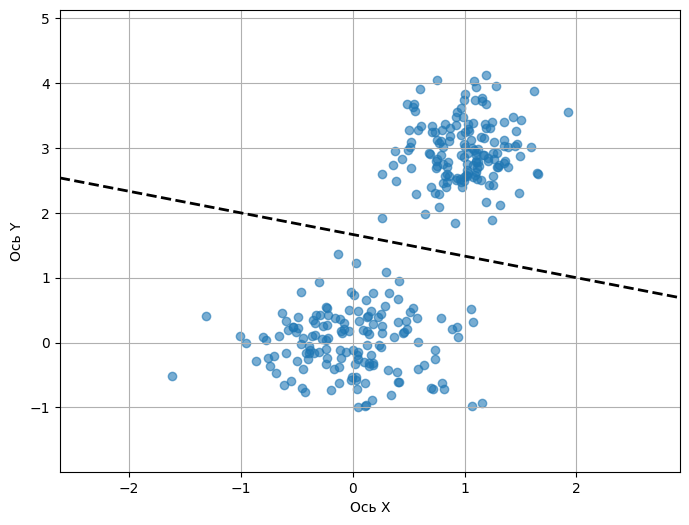

In [6]:
k = -1/3
b = 5/3

x_values = np.linspace(data[:,0].min()-1, data[:,0].max()+1, 100)
y_values = k*x_values + b
line = np.column_stack([x_values, y_values])

plot_clouds(data, line=line)

## Задания

### 1. Напишите функцию, которая вычисляет линию, разделяющую два облака по координатам их центров.
эта линия является серединным перпендикуляром к отрезку, соединяющему центры облаков

In [12]:
def find_line(c1: tuple[float, float], c2: tuple[float, float],
              x_min: float, x_max: float, count: int = 100) -> np.array:
    x1, y1 = c1
    x2, y2 = c2
    x_mid = (x1 + x2) / 2
    y_mid = (y1 + y2) / 2

    if np.isclose(x2, x1):
        k_main = float('inf')
    else:
        k_main = (y2 - y1) / (x2 - x1)

    if np.isclose(k_main, 0):
        k_perp = float('inf')
    elif k_main == float('inf'):
        k_perp = 0
    else:
        k_perp = -1 / k_main

    if k_perp == float('inf'):
        x_values = np.full(count, x_mid)
        y_values = np.linspace(y_mid - 1, y_mid + 1, count)
    else:
        x_values = np.linspace(x_min, x_max, count)
        y_values = k_perp * (x_values - x_mid) + y_mid

    return np.column_stack((x_values, y_values))


### 2. Проверьте работу вашей функции.
Выведите график точек и полученной прямой. Совпадает ли он с графиком выше?

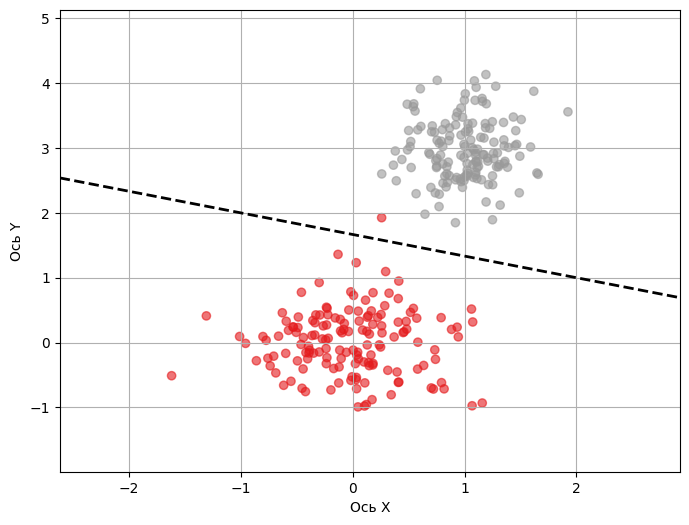

In [8]:
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
line_from_function = find_line(center_1, center_2, x_min, x_max)

plot_clouds(data, clusters=clusters, line=line_from_function)

### 3. Примените вашу функцию к наборам данных из файлов `1.npy`..`5.npy`.
Общий алгоритм:
1. Выгрузить данные из файла
2. Построить график точек
3. Приблизительно определить центры облаков (кластеров)
4. Вызвать функцию `find_line`
5. Построить график с прямой

График для файла /content/drive/MyDrive/Data Mining/2/1.npy:


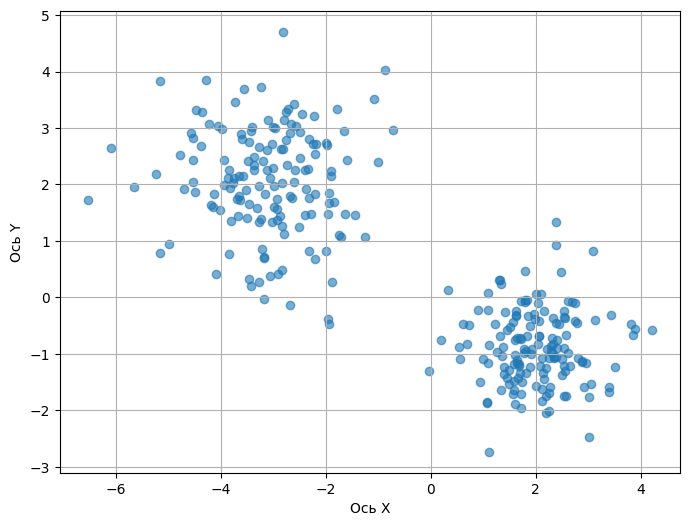

График с разделяющей линией для файла /content/drive/MyDrive/Data Mining/2/1.npy:


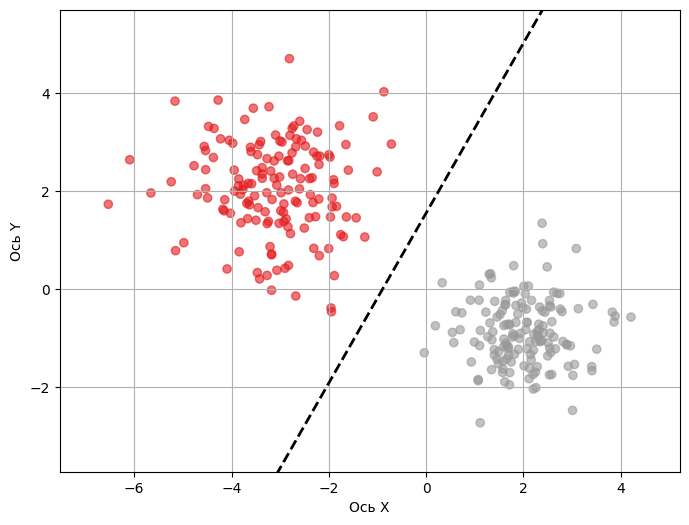

График для файла /content/drive/MyDrive/Data Mining/2/2.npy:


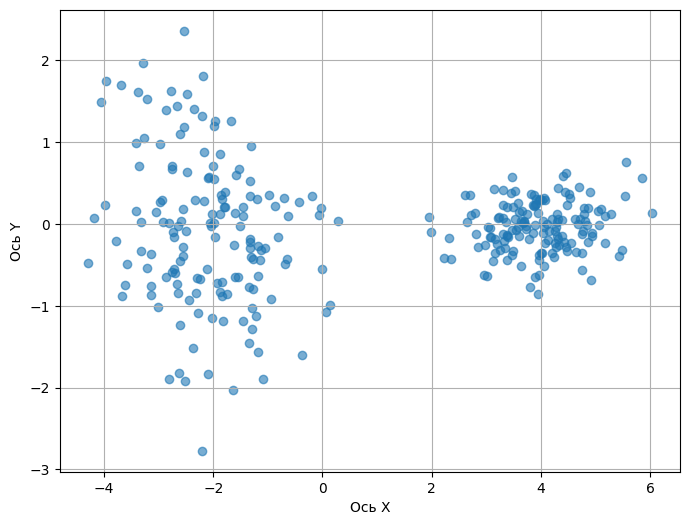

График с разделяющей линией для файла /content/drive/MyDrive/Data Mining/2/2.npy:


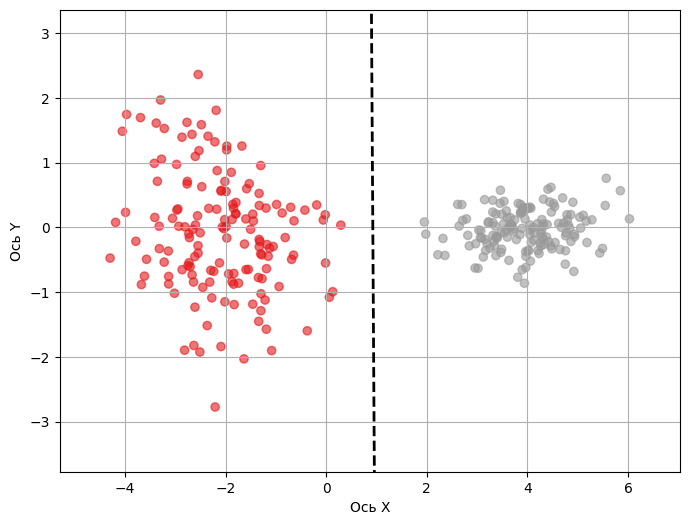

График для файла /content/drive/MyDrive/Data Mining/2/3.npy:


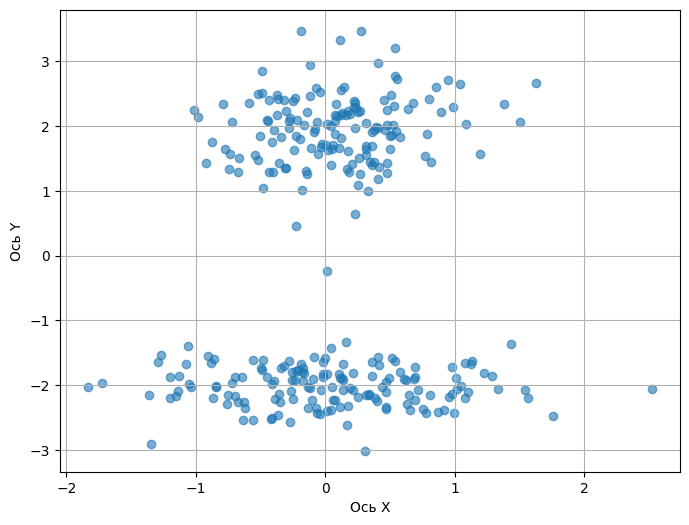

График с разделяющей линией для файла /content/drive/MyDrive/Data Mining/2/3.npy:


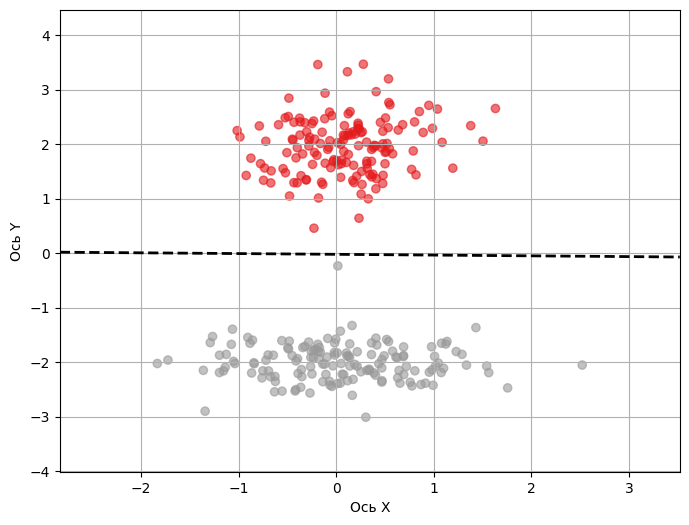

График для файла /content/drive/MyDrive/Data Mining/2/4.npy:


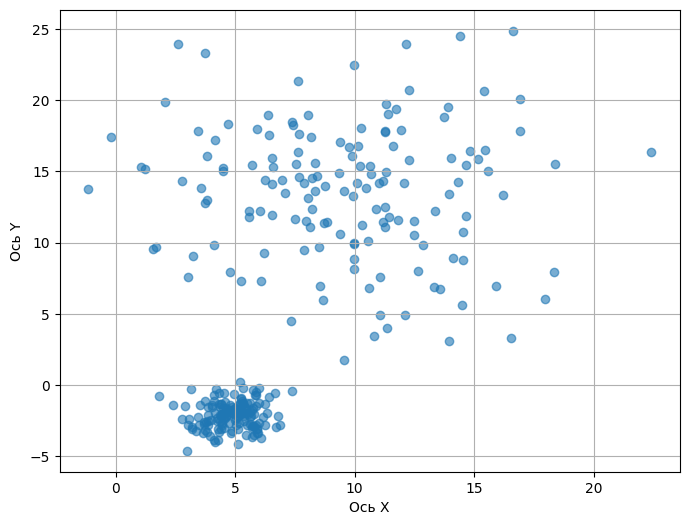

График с разделяющей линией для файла /content/drive/MyDrive/Data Mining/2/4.npy:


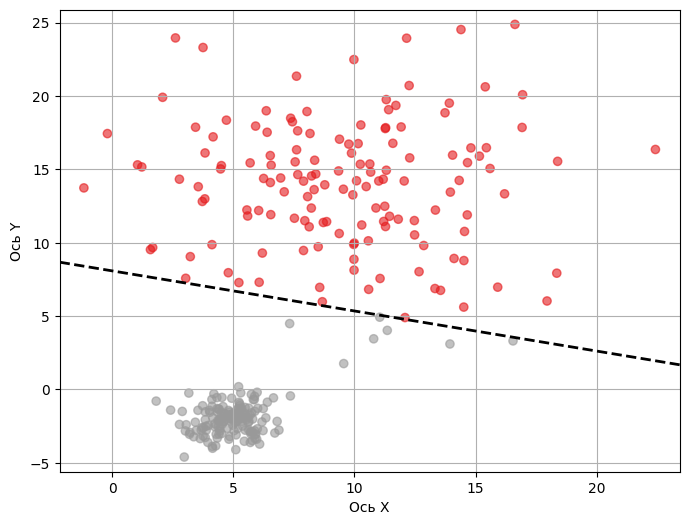

График для файла /content/drive/MyDrive/Data Mining/2/5.npy:


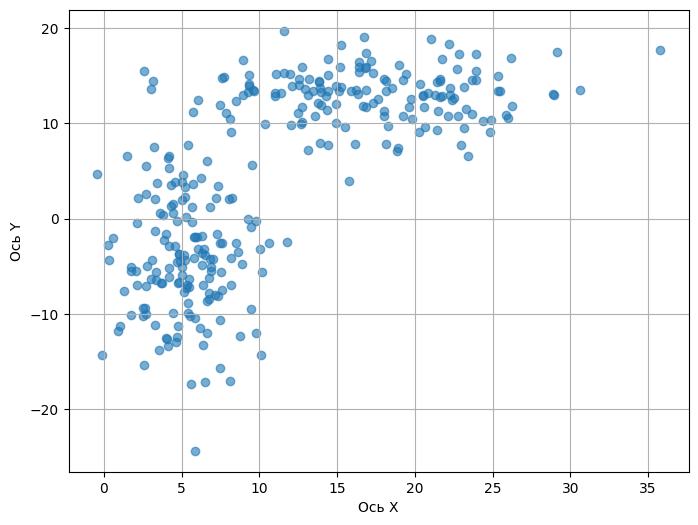

График с разделяющей линией для файла /content/drive/MyDrive/Data Mining/2/5.npy:


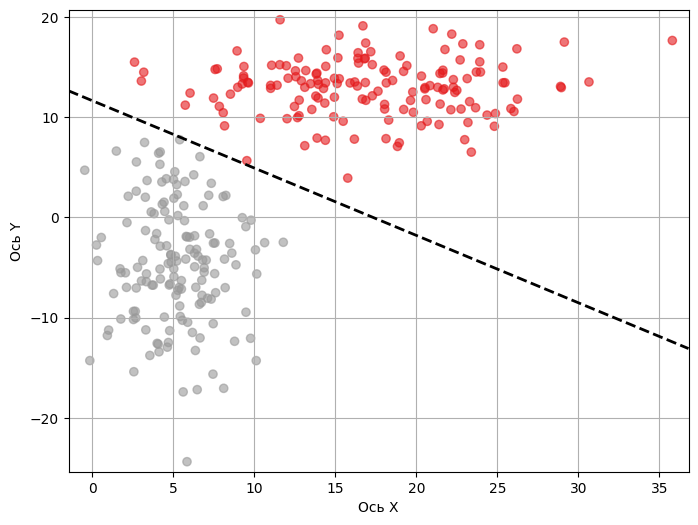

In [11]:
from sklearn.cluster import KMeans

for i in range(1, 6):
    filename = f"/content/drive/MyDrive/Data Mining/2/{i}.npy"
    data = np.load(filename)

    print(f"График для файла {filename}:")
    plot_clouds(data)

    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(data)
    clusters = kmeans.labels_
    centers = kmeans.cluster_centers_

    line = find_line(centers[0], centers[1], data[:, 0].min() - 1, data[:, 0].max() + 1)

    print(f"График с разделяющей линией для файла {filename}:")
    plot_clouds(data, clusters=clusters, line=line)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Доп. Напишите улучшенную версию функции `find_line`, принимающий несколько центров (т.е. способный разделить более двух кластеров)

In [ ]:
cloud_1 = np.random.normal((1,-3), 0.5, (NUM_POINTS, 2))  # Первое облако
cloud_2 = np.random.normal((-2, 1), (0.3,0.5), (NUM_POINTS, 2))  # Второе облако
cloud_3 = np.random.normal((3,1), (0.7,0.3), (NUM_POINTS, 2))  # Второе облако

data = np.vstack([cloud_1, cloud_2, cloud_3])
clusters = np.vstack([np.zeros(NUM_POINTS), np.ones(NUM_POINTS), np.ones(NUM_POINTS)*2])

plot_clouds(data, clusters=clusters)